# How to Scale Numerical Data

##  Data scaling is a recommended pre-processing step when working with many machine learning algorithms.
##  Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
##  How to apply standardization and normalization to improve the performance of predictive modeling algorithms

## Numerical Data Scaling Methods
## 1.  Data Normalization : Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
## 2.   Data Standardization: Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [4]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],[8, 0.05],[50, 0.005],[88, 0.07],[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


In [6]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],[8, 0.05],[50, 0.005],[88, 0.07],[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

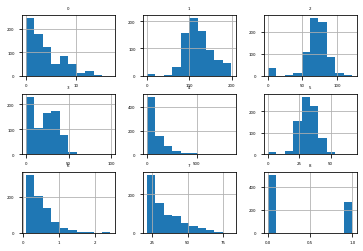

In [7]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [9]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.717 (0.040)


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

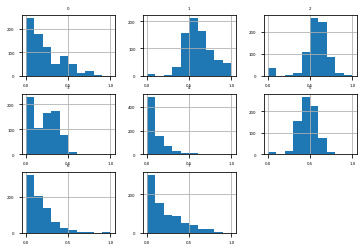

In [12]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()



In [14]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
odel = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 0.739 (0.053)


                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

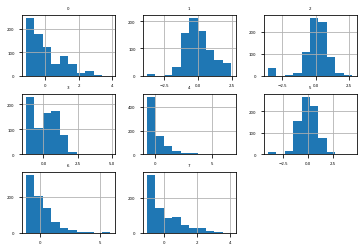

In [16]:
# visualize a standard scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [18]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
odel = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 0.741 (0.050)


# How to Scale Data With Outliers

##  Many machine learning algorithms prefer or perform better when numerical input variables are scaled.
##  Robust scaling techniques that use percentiles can be used to scale numerical input variables that contain outliers.
##  How to use the RobustScaler to scale numerical input variables using the median and interquartile range.

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

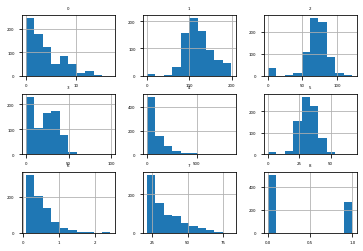

In [19]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [20]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.717 (0.040)


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

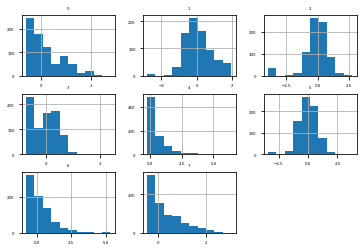

In [21]:
# visualize a robust scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [22]:
# evaluate knn on the diabetes dataset with robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.734 (0.044)


>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


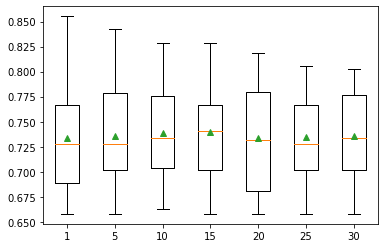

In [28]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('pima-indians-diabetes.csv', header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()





# How to Encode Categorical Data

##  Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.
##  How to use ordinal encoding for categorical variables that have a natural rank ordering.
##  How to use one hot encoding for categorical variables that do not have a natural rank ordering.


## Nominal and Ordinal Variables

##  Nominal Variable. Variable comprises a finite set of discrete values with no rank-order relationship between values.
##  Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values

## Encoding Categorical Data
##  Ordinal Encoding
##  One Hot Encoding
##  Dummy Variable Encoding

In [30]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


In [31]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)


[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [32]:
# example of a dummy variable encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)


[['red']
 ['green']
 ['blue']]
[[0. 1.]
 [1. 0.]
 [0. 0.]]


In [33]:
# ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])


Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


In [35]:
# evaluate logistic regression on the breast cancer dataset with an ordinal encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))



Accuracy: 75.79


In [36]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 70.53


# How to Make Distributions More Gaussian

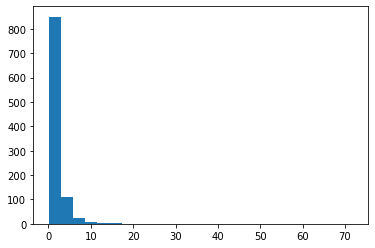

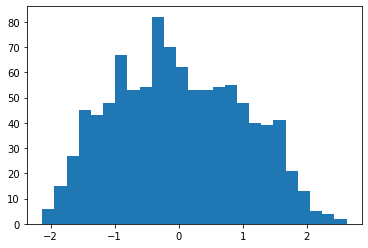

In [38]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

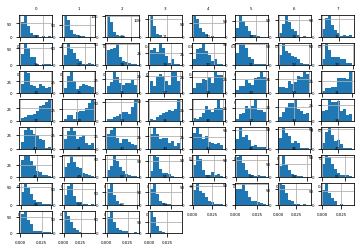

In [41]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()




In [43]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [44]:
# visualize a box-cox transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')
# NOTE: we expect this to cause an error!!!
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()




ValueError: The Box-Cox transformation can only be applied to strictly positive data

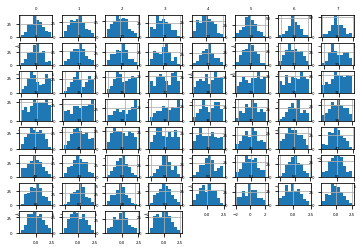

In [45]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables

fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [47]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.811 (0.085)


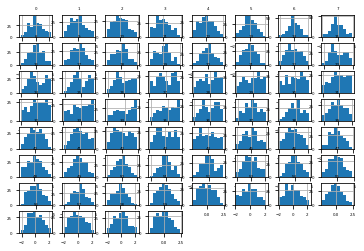

In [48]:
# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [49]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()

pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


In [50]:
# evaluate knn on the yeo-johnson standardized sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


# How to Change Numerical Data Distributions

##  Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian or standard probability distribution.
##  Quantile transforms are a technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution.
##  How to use the QuantileTransformer to change the probability distribution of numeric variables to improve the performance of predictive models.

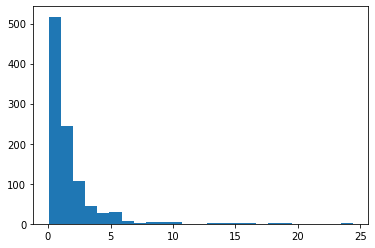

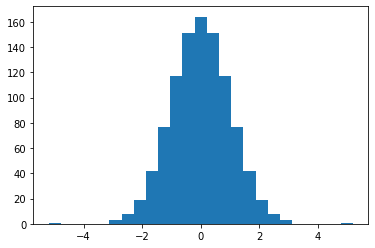

In [53]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

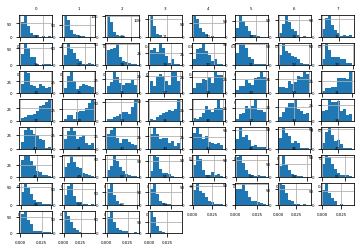

In [54]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [55]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


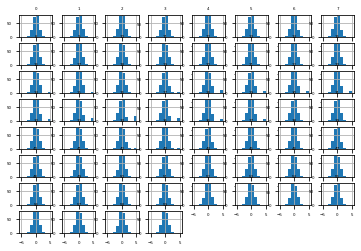

In [56]:
# visualize a normal quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [57]:
# evaluate knn on the sonar dataset with normal quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.817 (0.087)


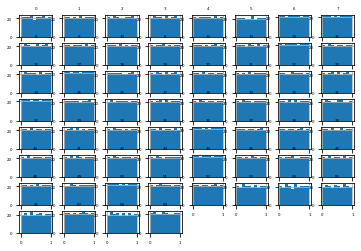

In [58]:
# visualize a uniform quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [59]:
# evaluate knn on the sonar dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
odel = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.845 (0.074)


>99 0.846 (0.075)


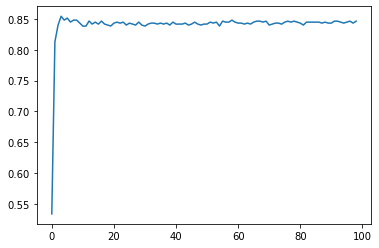

In [63]:
# explore number of quantiles on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100):
        # define the pipeline
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset('sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(mean(scores))
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()


# How to Transform Numerical to Categorical Data

##  Uniform: Each bin has the same width in the span of possible values for the variable.
##  Quantile: Each bin has the same number of values, split based on percentiles.
##  Clustered: Clusters are identified and examples are assigned to each group.

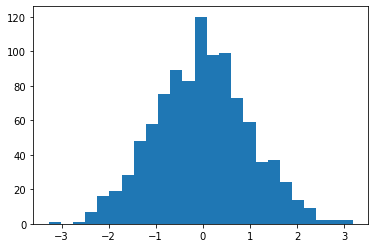

[[2.]
 [5.]
 [4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [4.]
 [3.]
 [3.]]


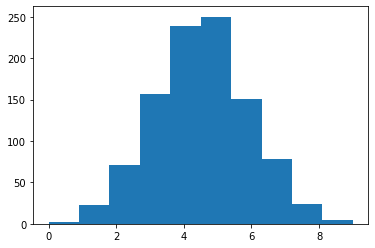

In [64]:
# demonstration of the discretization transform
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)
# summarize first few rows
print(data_trans[:10, :])
# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

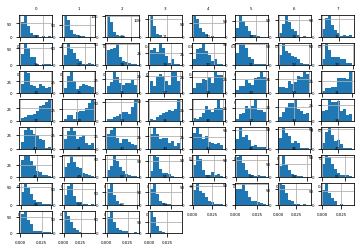

In [65]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [66]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.797 (0.073)


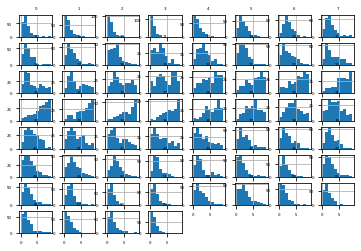

In [67]:
# visualize a uniform ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [68]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.829 (0.079)


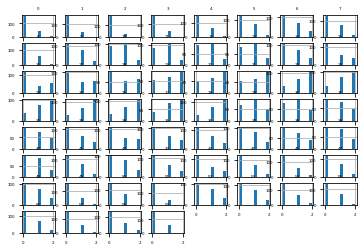

In [69]:
# visualize a k-means ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [70]:
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.814 (0.084)


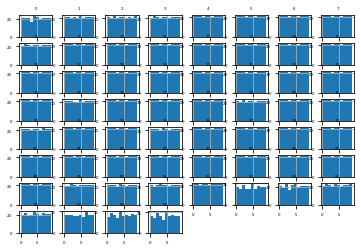

In [71]:
# visualize a quantile ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [73]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.840 (0.072)


>2 0.822 (0.066)
>3 0.870 (0.057)
>4 0.838 (0.078)
>5 0.838 (0.070)
>6 0.844 (0.067)
>7 0.852 (0.072)
>8 0.838 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


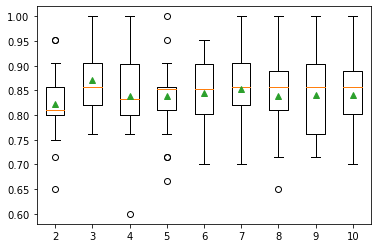

In [77]:
# explore number of discrete bins on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('sonar.csv', header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,11):
        # define the pipeline
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


# get the dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



# How to Derive New Input Variables

In [78]:
##  Some machine learning algorithms prefer or perform better with polynomial input features.
##  How to use the polynomial features transform to create new versions of input variables for predictive modeling.
##  How the degree of the polynomial impacts the number of input features created by the transform.

In [79]:
# demonstrate the types of features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2,3],[2,3],[2,3]])
print(data)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)


[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

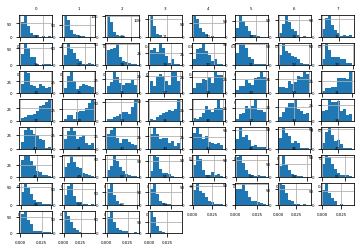

In [80]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [81]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [83]:
# visualize a polynomial features transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)


(208, 39711)


In [84]:
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.800 (0.077)
